In [ ]:
#!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle.json'

In [ ]:
!kaggle datasets download -d crowww/a-large-scale-fish-dataset

Dataset URL: https://www.kaggle.com/datasets/crowww/a-large-scale-fish-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
a-large-scale-fish-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
with ZipFile("a-large-scale-fish-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
DIR = '/content/Fish_Dataset/Fish_Dataset'
classes = [i for i in os.listdir(DIR) if '.' not in i]
classes

['Hourse Mackerel',
 'Shrimp',
 'Gilt-Head Bream',
 'Trout',
 'Black Sea Sprat',
 'Striped Red Mullet',
 'Red Sea Bream',
 'Red Mullet',
 'Sea Bass']

In [ ]:
import numpy as np
import pandas as pd
label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':
            if dirname.split()[-1]!='GT':
                label.append(os.path.split(dirname)[-1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [ ]:
df.head()

path            label
0  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...  Hourse Mackerel
1  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...  Hourse Mackerel
2  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...  Hourse Mackerel
3  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...  Hourse Mackerel
4  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...  Hourse Mackerel

In [ ]:
df.path[0]

'/content/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00295.png'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
df['label'].value_counts()

label
Hourse Mackerel       1000
Shrimp                1000
Gilt-Head Bream       1000
Trout                 1000
Black Sea Sprat       1000
Striped Red Mullet    1000
Red Sea Bream         1000
Red Mullet            1000
Sea Bass              1000
Name: count, dtype: int64

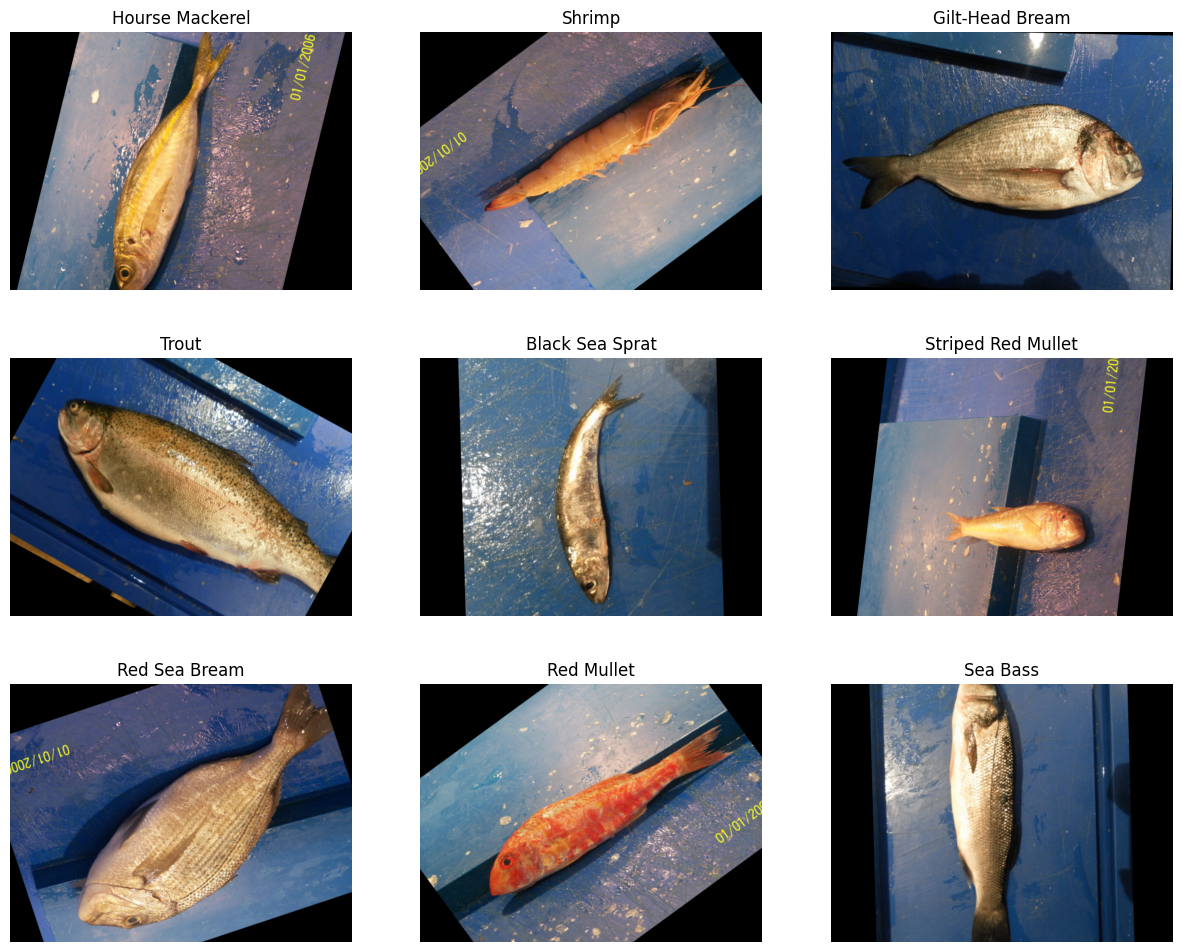

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
idx = 0
plt.figure(figsize=(15,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Set up ImageDataGenerator with rescaling for normalization
train_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_generator = ImageDataGenerator(rescale=1./255)

# Load training and validation datasets
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

# Load test dataset
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(128, 128),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [ ]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
train_images

In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [ ]:
cnn.add(tf.keras.layers.Dense(units=9,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 128, 128, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      16,777,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,069,353 (65.11 MB)

 Trainable params: 17,069,353 (65.11 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
training_history = cnn.fit(x=train_images,validation_data=val_images,epochs=3)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 86s 436ms/step - accuracy: 0.2383 - loss: 1.9420 - val_accuracy: 0.6535 - val_loss: 0.9514
Epoch 2/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 398ms/step - accuracy: 0.6897 - loss: 0.8542 - val_accuracy: 0.8458 - val_loss: 0.4285
Epoch 3/3
180/180 ━━━━━━━━━━━━━━━━━━━━ 64s 348ms/step - accuracy: 0.8565 - loss: 0.4191 - val_accuracy: 0.9028 - val_loss: 0.2633


In [ ]:
train_loss, train_acc = cnn.evaluate(train_images)
print('Training accuracy:', train_acc)

180/180 ━━━━━━━━━━━━━━━━━━━━ 49s 274ms/step - accuracy: 0.9569 - loss: 0.1356
Training accuracy: 0.9553819298744202


In [ ]:
val_loss, val_acc = cnn.evaluate(val_images)
print('Validation accuracy:', val_acc)

45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.9141 - loss: 0.2538
Validation accuracy: 0.9027777910232544


In [ ]:
results = cnn.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.23737
Test Accuracy: 91.94%


In [ ]:
cnn.save('fish_prediction_model.keras')

In [ ]:
training_history.history

{'accuracy': [0.3907985985279083, 0.7324652671813965, 0.8614583611488342],
 'loss': [1.6077487468719482, 0.7406560182571411, 0.40278205275535583],
 'val_accuracy': [0.6534722447395325, 0.8458333611488342, 0.9027777910232544],
 'val_loss': [0.9514439702033997, 0.4284801185131073, 0.2632502317428589]}

In [ ]:
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


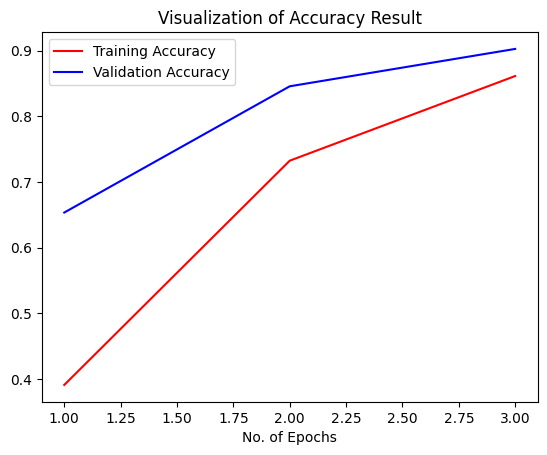

In [ ]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
cnn = tf.keras.models.load_model('fish_prediction_model.keras')

In [ ]:
results = cnn.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.23737
Test Accuracy: 91.94%


In [ ]:
y_pred = cnn.predict(test_images)
predicted_categories = tf.argmax(y_pred, axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 257ms/step


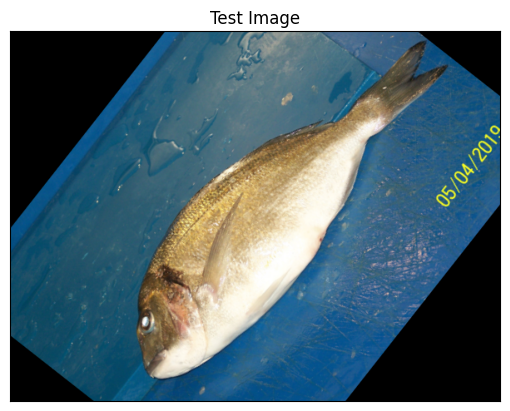

In [ ]:
import cv2
image_path = '/content/Glit-Head Bream 01.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


In [ ]:
print(predictions)

[[4.1131553e-11 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.2471556e-43 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

1


In [ ]:
class_indices = test_images.class_indices

class_names = list(class_indices.keys())

print("Class Names:", class_names)

Class Names: ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']


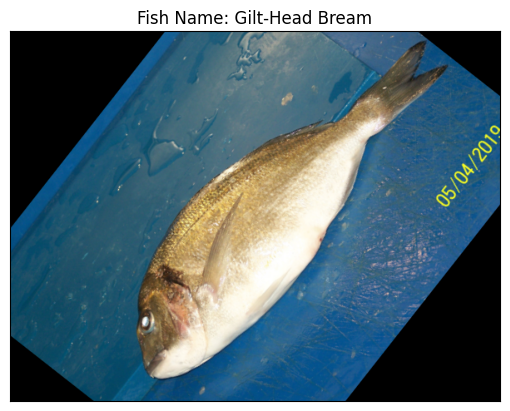

In [ ]:
model_prediction = class_names[result_index]
plt.imshow(img)
plt.title(f"Fish Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

57/57 ━━━━━━━━━━━━━━━━━━━━ 15s 270ms/step


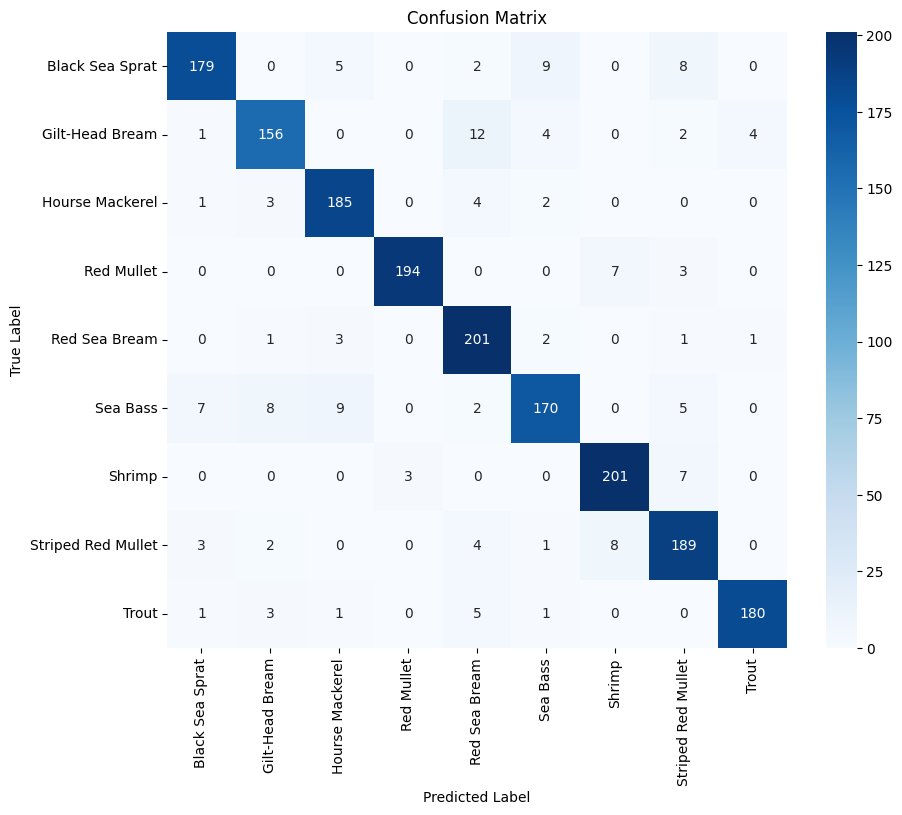

                    precision    recall  f1-score   support

   Black Sea Sprat       0.93      0.88      0.91       203
   Gilt-Head Bream       0.90      0.87      0.89       179
   Hourse Mackerel       0.91      0.95      0.93       195
        Red Mullet       0.98      0.95      0.97       204
     Red Sea Bream       0.87      0.96      0.92       209
          Sea Bass       0.90      0.85      0.87       201
            Shrimp       0.93      0.95      0.94       211
Striped Red Mullet       0.88      0.91      0.90       207
             Trout       0.97      0.94      0.96       191

          accuracy                           0.92      1800
         macro avg       0.92      0.92      0.92      1800
      weighted avg       0.92      0.92      0.92      1800



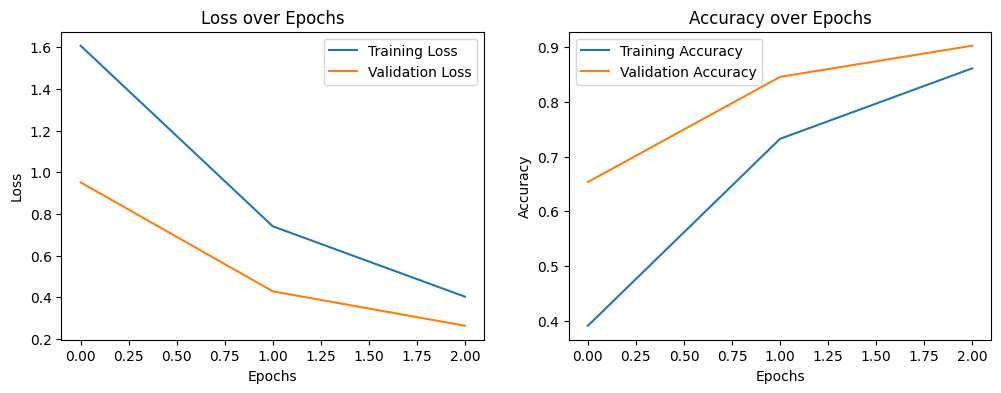

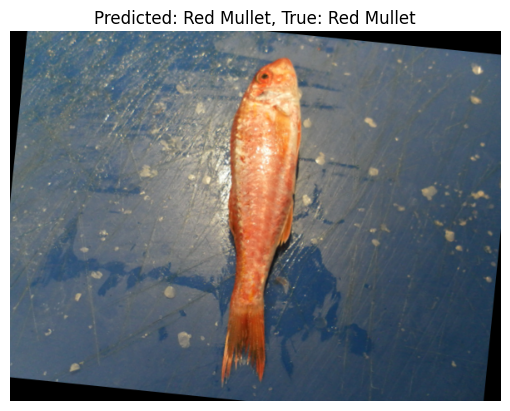

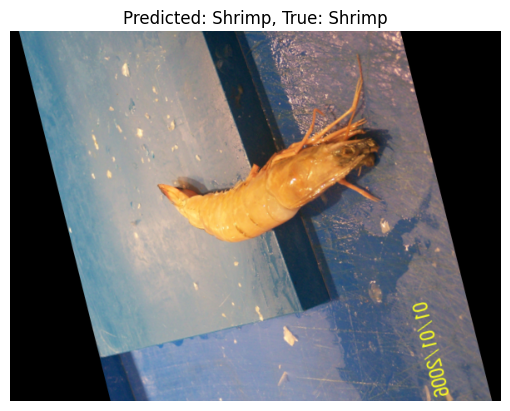

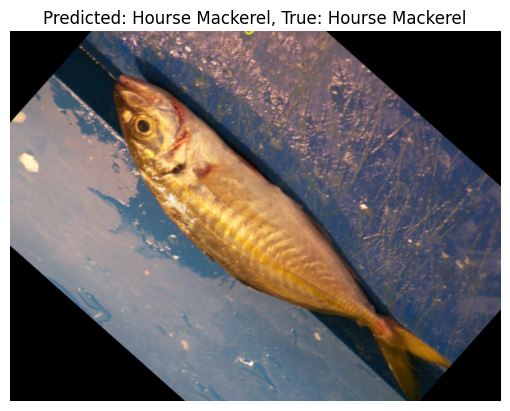

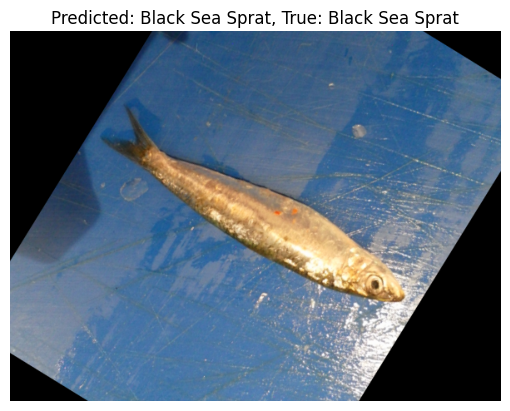

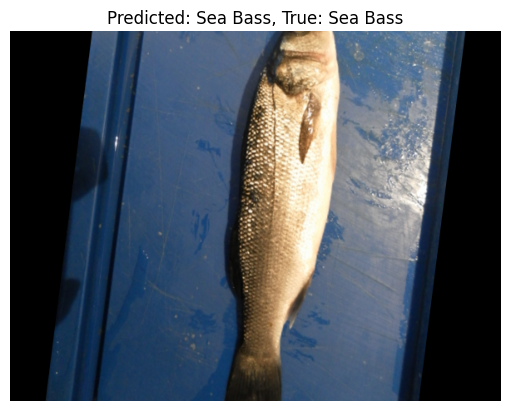

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json
import cv2


y_pred = cnn.predict(test_images)
predicted_categories = np.argmax(y_pred, axis=1)

y_true = test_images.classes

cm = confusion_matrix(y_true, predicted_categories)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_images.class_indices.keys()), yticklabels=list(test_images.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print(classification_report(y_true, predicted_categories, target_names=list(test_images.class_indices.keys())))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)

for i in range(5):
    img_path = test_images.filepaths[i]
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_categories[i]]}, True: {class_names[y_true[i]]}")
    plt.axis('off')
    plt.show()


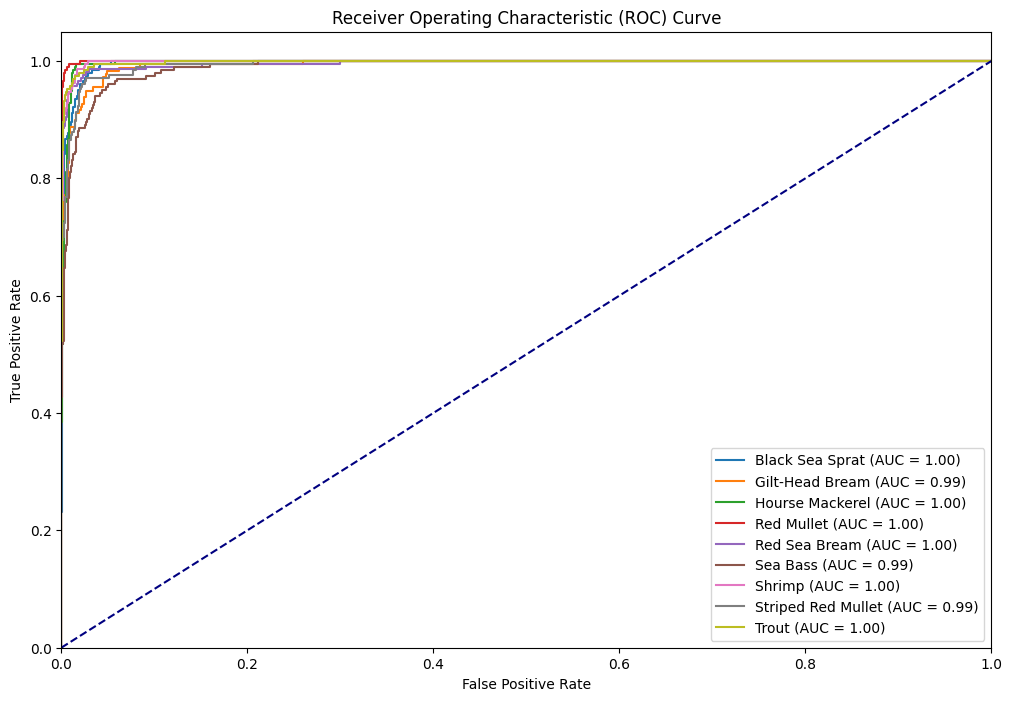

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))
y_pred_bin = label_binarize(predicted_categories, classes=np.arange(len(class_names)))

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


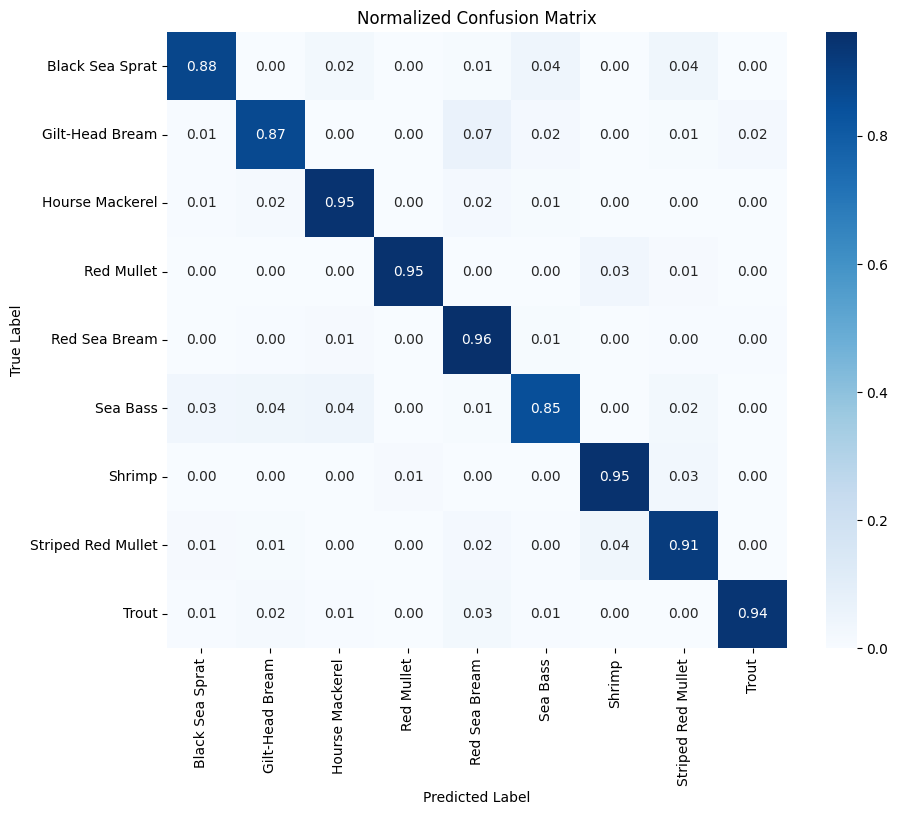

In [ ]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Normalized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


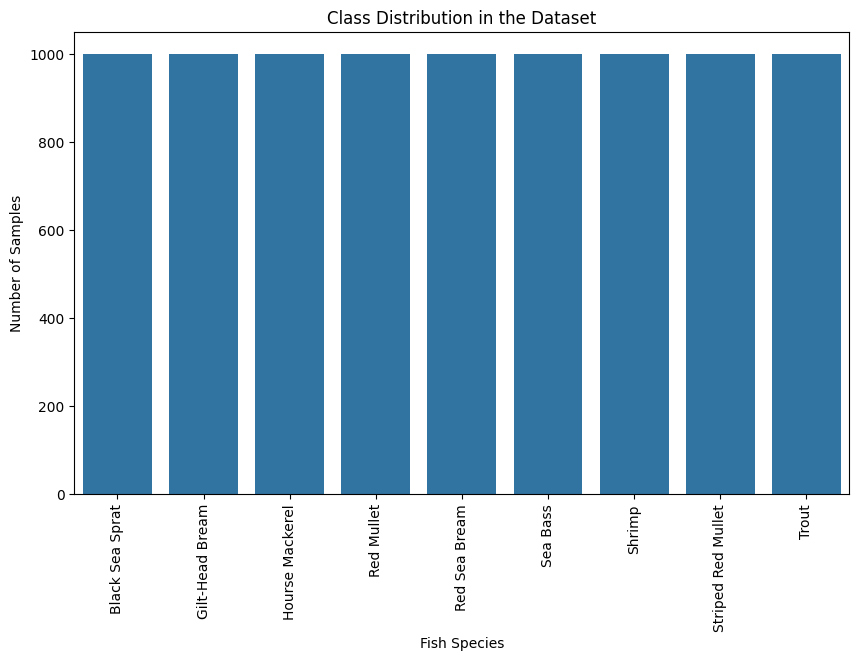

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, order=class_names)
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=90)
plt.xlabel('Fish Species')
plt.ylabel('Number of Samples')
plt.show()

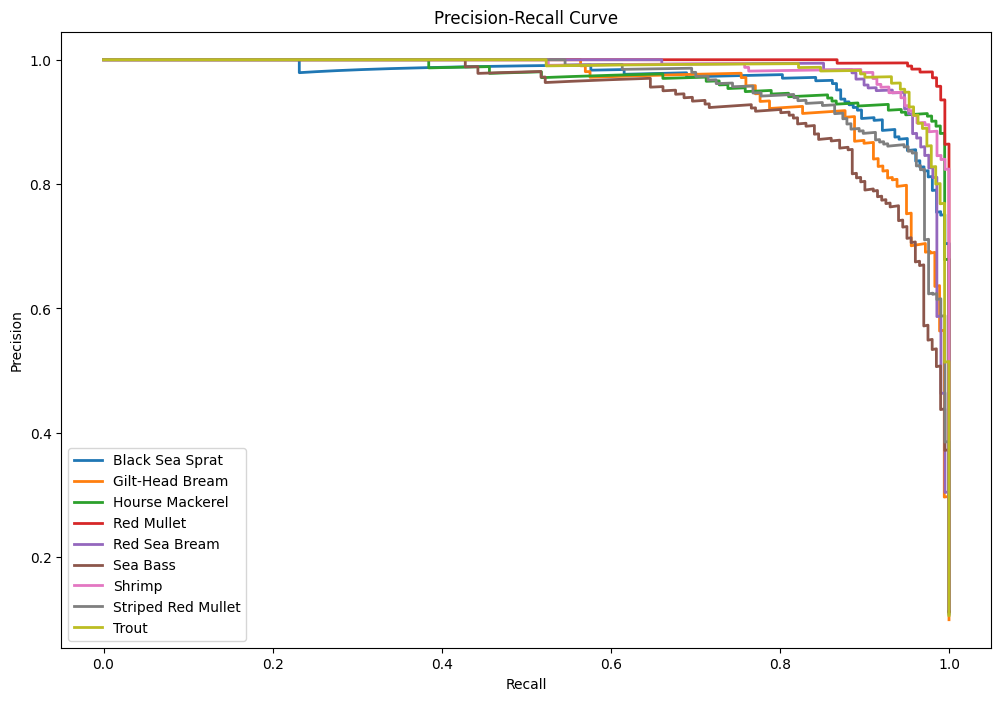

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(12, 8))
for i in range(len(class_names)):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred[:, i])
    plt.plot(recall, precision, lw=2, label=f'{class_names[i]}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [ ]:
import pickle

# Assuming `model` is your trained model object
with open('cnn.pkl', 'wb') as file:
    pickle.dump(cnn, file)  # Save model as a .pkl file


In [ ]:
with open('cnn.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
